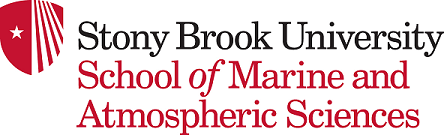

In [43]:
import os
os.chdir("C:/Users/Glarange/Google Drive/Stony/MAR_570")
from IPython.display import Image
Image(filename='C:/Users/Glarange/Google Drive/Stony/MAR_570/SBU SoMarineASciences_2clr.png') 

##  MAR 570 - Fall 2019 - Profs. S.Hameed & R.Wilson
### Gui Larangeira - PCA Analysis for NYISO average monthly temperatures and electric loads
### Part A
#### 0. Load libraries

In [44]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from scipy.linalg import inv, solve, det, norm
from numpy import linalg
import statistics as st
from scipy.stats import norm, pearsonr
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)},linewidth=150) 
#def printmd(string):
#    display(Markdown(string))

### 1. Describe the data. Import and visualize it
The data is **(a)** the NYISO monthly load zone loads per each of the 11 zones, 2008-2012. Downloaded from https://www.nyiso.com/custom-reports?report=int_rt_actual_load. And **(b)** corresponding average county temperature for a representative county included in the load zone. Downoloaded from https://www.ncdc.noaa.gov/cag/county/time-series/NY-055/tavg/all/1/2008-2013?base_prd=true&begbaseyear=2008&endbaseyear=2008

In [46]:
# Import the Data as a Pandas data frame (Loads in KWh)
df = pd.read_csv("C:/Users/Glarange/Google Drive/Stony/MAR_570/project_data/Load/NYISO_Load_200812_deseasoned.csv", index_col=0)
df_temp = pd.read_csv("C:/Users/Glarange/Google Drive/Stony/MAR_570/project_data/NY_LZ_temps_deseas.csv", index_col=0)
loadzones = df.columns.values
index = df.index.values
df_temp.columns = loadzones
df_temp.index = index
Image(filename='C:/Users/Glarange/Google Drive/Stony/MAR_570/NYISO_Load_Zones.png')

# Pull the values from the data-frame, end up with the numpy matrix
X = df.values
Y = df_temp.values

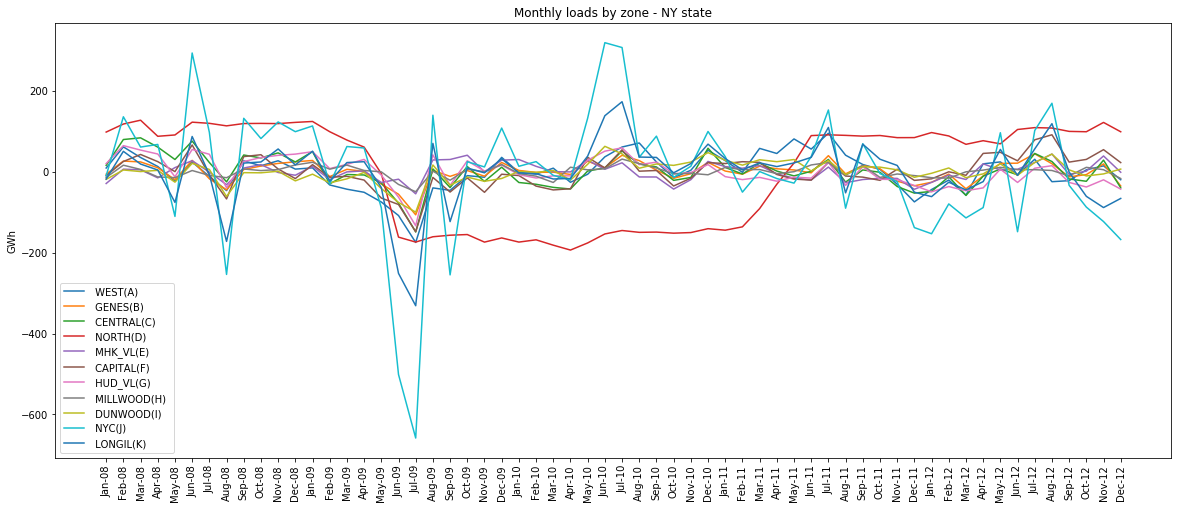

In [49]:
# Plot the 11 variables x_k
# Loads
# Plot the 7 bottom variables x_k
plt.figure(figsize=(20,8))
plt.plot(df)
plt.title('Monthly loads by zone (DE-SEASONED) - NY state')
plt.ylabel('GWh')
plt.xticks(rotation=90)
plt.legend(loadzones);
plt.show()

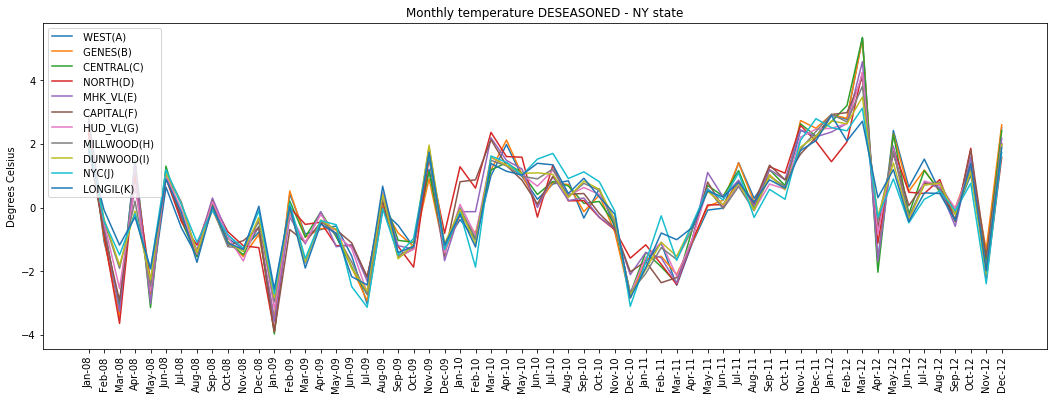

In [51]:
# Same with temperatures
# Plot the 7 bottom variables x_k
plt.figure(figsize=(18,6))
plt.plot(df_temp)
plt.title('Monthly temperature DESEASONED - NY state')
plt.ylabel('Degrees Celsius')
plt.xticks(rotation=90)
plt.legend(loadzones);
plt.show()

### 2. Calculate the covariance matrix. Show the eigenvalue spectrum and apply North's rule (looking at the CIs)
#### 2.1 Calculate covariances

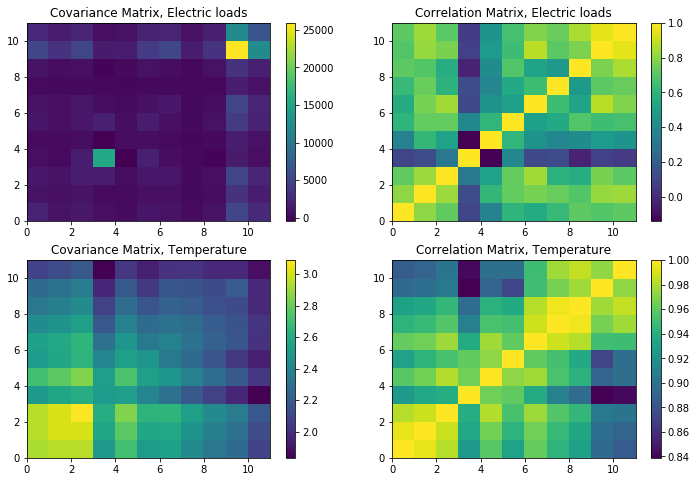

In [53]:
# Calculate the covariance matrix, laods
n = X.shape[0]                  # number of rows
nc = X.shape[1]
ones = np.ones((n,n))
# X_dm = X - ones @ X/n           # demean the matrix, only Python 3.6
Xdm = X - np.dot(ones, X/n)
#S = X_dm.transpose() @ X_dm/(n-1)  
SX = np.dot(Xdm.transpose(), Xdm/(n-1))

# Calculate the covariance matrix, temps
ones = np.ones((n,n))
# X_dm = X - ones @ X/n           # demean the matrix, only Python 3.6
Ydm = Y - np.dot(ones, Y/n)
#S = X_dm.transpose() @ X_dm/(n-1)  
SY = np.dot(Ydm.transpose(), Ydm/(n-1))

k = SY.shape[0]
DY = np.zeros((k,k))
DX = np.zeros((k,k))

for k in range(k):
    DX[k,k] = np.sqrt(SX[k,k])
    DY[k,k] = np.sqrt(SY[k,k])
#R = linalg.inv(D) @ S @ linalg.inv(D)
RX = np.dot(np.dot(linalg.inv(DX), SX), linalg.inv(DX))
RY = np.dot(np.dot(linalg.inv(DY), SY), linalg.inv(DY))

plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.pcolor(SX)
plt.title('Covariance Matrix, Electric loads')
plt.colorbar()
plt.subplot(2, 2, 2)
plt.pcolor(RX)
plt.title('Correlation Matrix, Electric loads')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.pcolor(SY)
plt.title('Covariance Matrix, Temperature')
plt.colorbar()
plt.subplot(2, 2, 4)
plt.pcolor(RY)
plt.title('Correlation Matrix, Temperature')
plt.colorbar()

#### 2.2 Calculate the Eigenvectors and Eigenvalues

In [56]:
# Covariance Load
eSX = linalg.eig(SX)
eXu = eSX[0]         # the LOAD eigenvalues
EXu = eSX[1]         # the eigenvectors
idX = eXu.argsort()[::-1]   
eX = eXu[idX]
EX = EXu[:,idX]

# Covariance temps
eSY = linalg.eig(SY)
eYu = eSY[0]         # the eigenvalues
EYu = eSY[1]         # the eigenvectors
idY = eYu.argsort()[::-1]   
eY = eYu[idY]
EY = EYu[:,idY]

# Correlation Load
eRX = linalg.eig(RX)
eRXu = eRX[0]         # the LOAD eigenvalues
ERXu = eRX[1]         # the eigenvectors
idRX = eRXu.argsort()[::-1]   
eRX = eRXu[idRX]
ERX = ERXu[:,idRX]

# Correlation temps
eRY = linalg.eig(RY)
eRYu = eRY[0]         # the eigenvalues
ERYu = eRY[1]         # the eigenvectors
idRY = eRYu.argsort()[::-1]   
eRY = eRYu[idRY]
ERY = ERYu[:,idRY]

dfEX = pd.DataFrame(EX)
dfeX = pd.DataFrame(eX).transpose()
dfEX = dfEX.append(dfeX)

dfEY = pd.DataFrame(EY)
dfeY = pd.DataFrame(eY).transpose()
dfEY = dfEY.append(dfeY)

dfERX = pd.DataFrame(ERX)
dfeRX = pd.DataFrame(eRX).transpose()
dfERX = dfERX.append(dfeRX)

dfERY = pd.DataFrame(ERY)
dfeRY = pd.DataFrame(eRY).transpose()
dfERY = dfERY.append(dfeRY)

dfEX.columns = (['mode_1', 'mode_2', 'mode_3', 'mode_4','mode_5', 'mode_6','mode_7','mode_8','mode_9', 'mode_10', 'mode_11'])
dfEX.index = (['elem. 1','2','3','4','5','6','7','8','9','10','11', 'Eigenvalues'])
print("Electric Loads Covariance Eigenvectors and Eigenvalues")
dfEX.round(3)

Electric Loads Covariance Eigenvectors and Eigenvalues


,mode_1,mode_2,mode_3,mode_4,mode_5,mode_6,mode_7,mode_8,mode_9,mode_10,mode_11
elem. 1,-0.177,-0.006,-0.679,0.024,-0.596,0.250,-0.147,0.002,-0.005,-0.207,0.158
2,-0.114,-0.002,-0.224,-0.120,0.007,-0.278,-0.319,-0.016,-0.611,0.590,-0.148
3,-0.171,0.064,-0.271,-0.565,-0.017,-0.284,0.417,-0.129,0.458,0.285,-0.107
4,-0.106,0.983,0.079,0.060,-0.048,0.004,-0.050,-0.076,-0.021,-0.029,-0.024
5,-0.056,-0.037,-0.180,-0.220,0.439,0.023,-0.509,-0.595,0.112,-0.307,-0.050
6,-0.149,0.096,-0.433,0.024,0.656,0.185,0.140,0.489,-0.071,-0.037,0.224
7,-0.165,-0.010,0.152,-0.469,-0.085,-0.328,0.147,0.155,-0.458,-0.593,0.085
8,-0.055,0.000,-0.042,0.001,-0.036,-0.174,-0.378,0.506,0.284,-0.173,-0.674
9,-0.114,-0.036,-0.211,0.336,0.099,0.076,0.504,-0.317,-0.277,-0.172,-0.594
10,-0.828,-0.114,0.341,-0.076,-0.020,0.397,-0.055,0.002,0.024,0.124,-0.045


In [57]:
dfEY.columns = dfEX.columns
dfEY.index = dfEX.index
dfEY.columns = (['mode_1', 'mode_2', 'mode_3', 'mode_4','mode_5', 'mode_6','mode_7','mode_8','mode_9', 'mode_10', 'mode_11'])
#dfEY.index = (['elem. 1','2','3','4','5','6','7','8','9','10','11', "Eigenvalues"])
print("Temperatures Covariance Eigenvectors and Eigenvalues")
dfEY.round(3)

Temperatures Covariance Eigenvectors and Eigenvalues


,mode_1,mode_2,mode_3,mode_4,mode_5,mode_6,mode_7,mode_8,mode_9,mode_10,mode_11
elem. 1,0.326,-0.206,-0.511,0.059,-0.325,-0.035,-0.349,-0.267,-0.518,-0.139,0.006
2,0.333,-0.220,-0.424,0.030,-0.265,-0.016,0.248,-0.048,0.713,0.111,-0.075
3,0.339,-0.185,-0.259,-0.207,0.426,-0.010,0.426,0.515,-0.322,0.081,0.053
4,0.295,-0.386,0.460,0.664,-0.150,-0.193,0.035,0.211,-0.064,0.002,0.046
5,0.318,-0.219,0.181,-0.121,0.592,-0.194,-0.060,-0.555,0.140,-0.289,-0.011
6,0.299,-0.183,0.462,-0.477,-0.368,0.467,0.190,-0.149,-0.122,0.079,-0.053
7,0.300,0.078,0.048,-0.014,0.241,0.150,-0.590,0.108,0.109,0.669,-0.047
8,0.290,0.246,0.080,-0.185,-0.111,-0.037,-0.280,0.308,0.202,-0.403,0.651
9,0.280,0.319,0.082,-0.061,-0.055,-0.092,-0.157,0.289,0.051,-0.375,-0.739
10,0.273,0.506,-0.089,0.470,0.150,0.539,0.258,-0.218,-0.062,-0.062,0.082


In [58]:
dfERX.columns = dfEX.columns
dfERX.index = dfEX.index
print("Electr. Load Correlation Eigenvectors and Eigenvalues")
dfERX.round(3)

Electr. Load Correlation Eigenvectors and Eigenvalues


,mode_1,mode_2,mode_3,mode_4,mode_5,mode_6,mode_7,mode_8,mode_9,mode_10,mode_11
elem. 1,-0.308,0.015,-0.159,-0.309,0.411,-0.589,-0.137,0.366,-0.295,0.080,-0.151
2,-0.353,0.026,0.064,0.068,0.191,-0.190,-0.334,-0.807,-0.014,0.033,0.172
3,-0.332,-0.201,0.075,0.225,-0.160,-0.452,0.383,0.068,0.488,-0.406,0.092
4,-0.062,-0.881,0.025,-0.041,-0.045,0.124,-0.393,0.129,0.105,0.132,0.026
5,-0.228,0.257,0.779,0.198,0.036,0.073,-0.336,0.312,0.113,0.080,-0.034
6,-0.304,-0.252,0.412,-0.292,-0.006,0.215,0.543,-0.165,-0.450,-0.035,-0.129
7,-0.316,0.009,-0.201,0.506,-0.373,-0.088,0.121,0.022,-0.179,0.591,-0.245
8,-0.292,-0.006,-0.214,0.263,0.681,0.446,0.223,0.121,0.223,0.106,0.111
9,-0.302,0.180,-0.077,-0.615,-0.254,0.113,0.049,0.030,0.440,0.409,0.227
10,-0.351,0.088,-0.209,0.086,-0.274,0.192,-0.173,0.230,-0.401,-0.326,0.596


In [59]:
dfERY.columns = dfEX.columns
dfERY.index = dfEX.index
print("Temperature anomaly squared Correlation Eigenvectors and Eigenvalues")
dfERY.round(3)

Temperature anomaly squared Correlation Eigenvectors and Eigenvalues


,mode_1,mode_2,mode_3,mode_4,mode_5,mode_6,mode_7,mode_8,mode_9,mode_10,mode_11
elem. 1,0.301,-0.210,-0.521,0.001,-0.333,-0.001,0.242,-0.361,-0.094,0.533,0.011
2,0.303,-0.221,-0.432,0.015,-0.277,0.018,-0.199,0.046,-0.034,-0.737,-0.097
3,0.305,-0.192,-0.277,0.151,0.388,0.085,-0.334,0.579,0.252,0.311,0.069
4,0.294,-0.410,0.435,-0.638,-0.241,0.208,0.057,0.192,0.042,0.059,0.051
5,0.304,-0.240,0.140,0.059,0.607,0.243,-0.092,-0.450,-0.424,-0.088,-0.014
6,0.301,-0.220,0.459,0.472,-0.257,-0.495,-0.283,-0.132,0.091,0.086,-0.057
7,0.308,0.036,0.024,-0.008,0.299,-0.151,0.553,-0.164,0.645,-0.197,-0.055
8,0.307,0.208,0.076,0.205,-0.065,-0.059,0.371,0.292,-0.362,-0.107,0.665
9,0.305,0.291,0.084,0.075,-0.031,0.019,0.262,0.323,-0.331,0.062,-0.723
10,0.294,0.483,-0.111,-0.520,0.128,-0.482,-0.344,-0.135,-0.060,0.048,0.081


#### 2.3 Fractional Variance

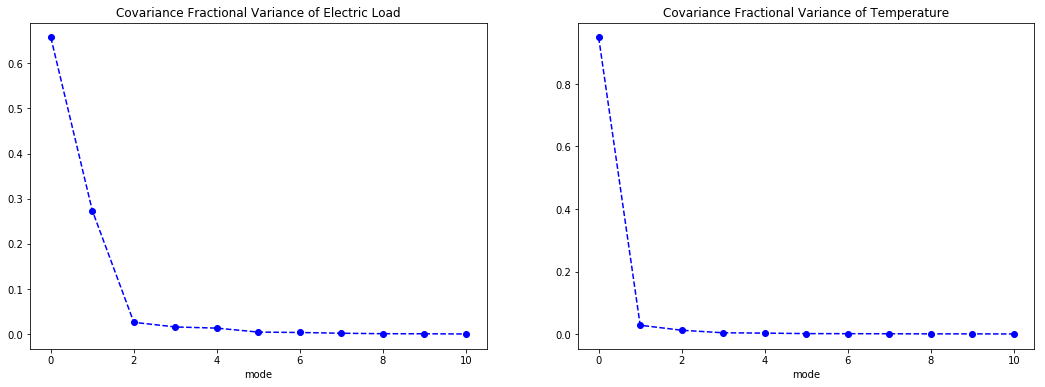

In [79]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.plot(eX/np.sum(eX),linestyle='--', marker='o', color='b')
plt.xlabel('mode')
plt.title('Covariance Fractional Variance of Electric Load')

plt.subplot(1, 2, 2)
plt.plot(eY/np.sum(eY),linestyle='--', marker='o', color='b')
plt.xlabel('mode')
plt.title('Covariance Fractional Variance of Temperature')
"""
plt.subplot(2, 2, 3)
plt.plot(eRX/np.sum(eRX),linestyle='--', marker='o', color='b')
plt.xlabel('mode')
plt.title('Correlation Fractional Variance of Electric Load')

plt.subplot(2, 2, 4)
plt.plot(eRY/np.sum(eRY),linestyle='--', marker='o', color='b')
plt.xlabel('mode')
plt.title('Correlation Fractional Variance of the Temps,')
"""

plt.show()

#### 2.4 Eigenvector Truncation

In [67]:
# Truncating the eigenvectors, eigenvalues
# For covariance matrix using North's rule of thumb

dif = pd.DataFrame((eX[0:10]-eX[1:11]).transpose())
h = (2/n)**.5
denom_p = 1 + norm.ppf(1-.05/2)*h
denom_m = 1 - norm.ppf(1-.05/2)*h
delta = pd.DataFrame((h * eX).transpose())
eigs = pd.DataFrame(eX.transpose())
UL = eigs/denom_m
BL = eigs/denom_p

difY = pd.DataFrame((eY[0:10]-eY[1:11]).transpose())
denom_pY = 1 + norm.ppf(1-.05/2)*h
denom_mY = 1 - norm.ppf(1-.05/2)*h
deltaY = pd.DataFrame((h * eY).transpose())
eigsY = pd.DataFrame(eY.transpose())
ULY = eigsY/denom_mY
BLY = eigsY/denom_pY

north = pd.concat([eigs,dif,delta, BL, UL,eigsY,difY,deltaY, BLY, ULY], axis=1)
north.columns = ['Covar Eigs Electr.Load.','spacing','sampl. error', 'BL CI', 'UL CI', 'Covar Eigs Temps.','spacing','sampl. error', 'BL CI', 'UL CI']
north.round(3)

,Covar Eigs Electr.Load.,spacing,sampl. error,BL CI,UL CI,Covar Eigs Temps.,spacing,sampl. error,BL CI,UL CI
0,37158.806,21685.627,6784.239,27366.139,57865.233,26.227,25.450,4.788,19.315,40.842
1,15473.178,13983.884,2825.003,11395.446,24095.475,0.777,0.443,0.142,0.572,1.210
2,1489.294,580.717,271.907,1096.812,2319.190,0.334,0.226,0.061,0.246,0.520
3,908.577,146.839,165.883,669.135,1414.875,0.108,0.028,0.020,0.080,0.168
4,761.738,495.082,139.074,560.993,1186.211,0.080,0.044,0.015,0.059,0.125
5,266.656,51.086,48.685,196.383,415.248,0.036,0.006,0.007,0.027,0.056
6,215.570,93.589,39.357,158.760,335.694,0.030,0.009,0.005,0.022,0.047
7,121.981,58.035,22.271,89.835,189.954,0.021,0.008,0.004,0.016,0.033
8,63.946,11.870,11.675,47.094,99.580,0.014,0.001,0.002,0.010,0.021
9,52.077,22.057,9.508,38.353,81.096,0.013,0.009,0.002,0.009,0.020


**North's Rule: Analysis of the relevant eigenvectors**<br>
**(a) Loads**
Since on the third row the spacing 580 is comparable to twice the sampling error, 2(272), **we may drop the third eigenvector.**<br>
**(b) Temps (Something not quite right)**<br>
It is only at the fourth eigenvector that the spacing is comparable to the sampling error. **We use the first three eigenvectors**.<br>
This could be caused by the relatively high $n$.

### 3.  First eigenvector and its interpretation

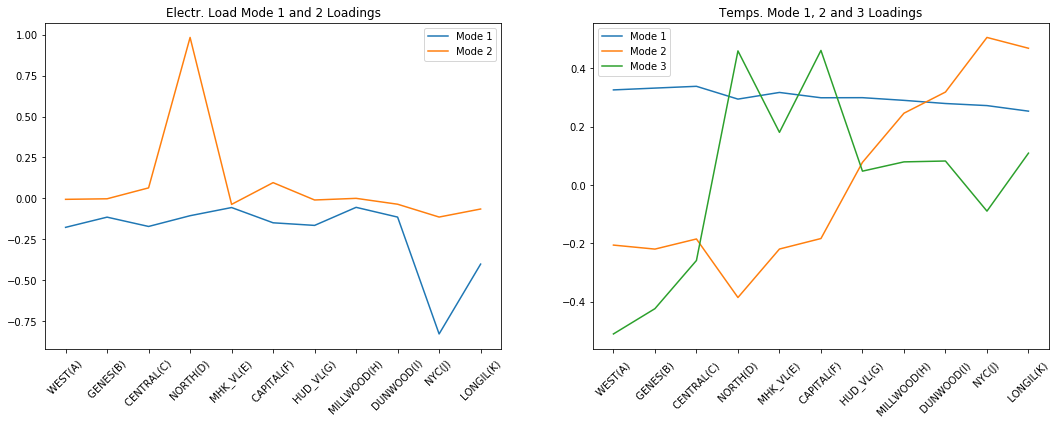

In [98]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.plot(loadzones,EX[:,0], label = 'Mode 1')
plt.plot(EX[:,1], label = 'Mode 2')
plt.title('Electr. Load Mode 1 and 2 Loadings')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(load_names,EY[:,0], label = 'Mode 1')
plt.plot(EY[:,1], label = 'Mode 2')
plt.plot(EY[:,2], label = 'Mode 3')
plt.title('Temps. Mode 1, 2 and 3 Loadings')
plt.xticks(rotation=45)
plt.legend()

plt.legend()
plt.show()

**Interpretation of the Eigenvector**: The first eigenvector of the covariance-computed set has the direction of greatest variation of the data. It is no surprise then that the largest loadings correspond to the columns (zones) with largest variation, namely NYC and Long Island.

### 4. First and useful Eigenvectors and Principal Components
Need to show initial fit with 1 and then 3 eigenvectors

In [99]:
eX1 = EX[:,0].reshape(11,1)
uX1 =  Xdm @ eX1
Xr1 =  uX1 @ eX1.transpose() 

eX2 = EX[:,0:3].reshape(11,3)
uX2 =  Xdm @ eX3
Xr2 =  uX3 @ eX3.transpose() 

eY1 = EY[:,0].reshape(11,1)
uY1 =  Ydm @ eY1
Yr1 =  uY1 @ eY1.transpose() 

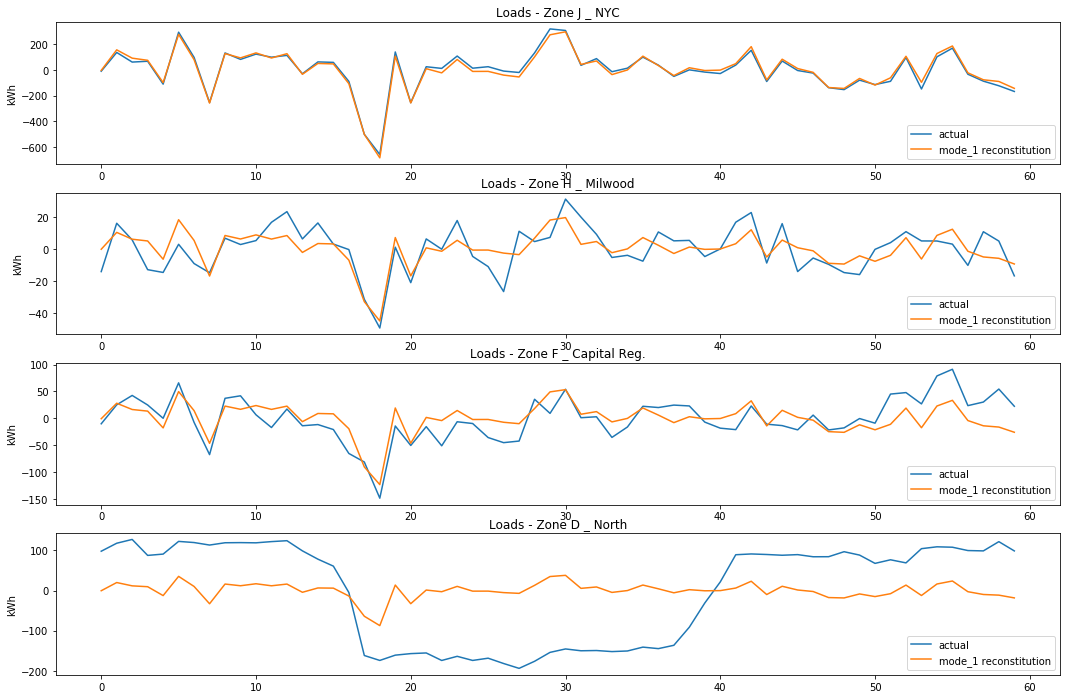

In [83]:
plt.figure(figsize=(18,12))
plt.subplot(4, 1, 1)
plt.plot(Xdm[:,9], label = 'actual')
plt.plot(Xr1[:,9], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.ylabel('kWh')
plt.title("Loads - Zone J _ NYC")

plt.subplot(4, 1, 2)
plt.plot(Xdm[:,7], label = 'actual')
plt.plot(Xr1[:,7], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.ylabel('kWh')
plt.title("Loads - Zone H _ Milwood")

plt.subplot(4, 1, 3)
plt.plot(Xdm[:,5], label = 'actual')
plt.plot(Xr1[:,5], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.ylabel('kWh')
plt.title("Loads - Zone F _ Capital Reg.")

plt.subplot(4, 1, 4)
plt.plot(Xdm[:,3], label = 'actual')
plt.plot(Xr1[:,3], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.ylabel('kWh')
plt.title("Loads - Zone D _ North")
plt.show()

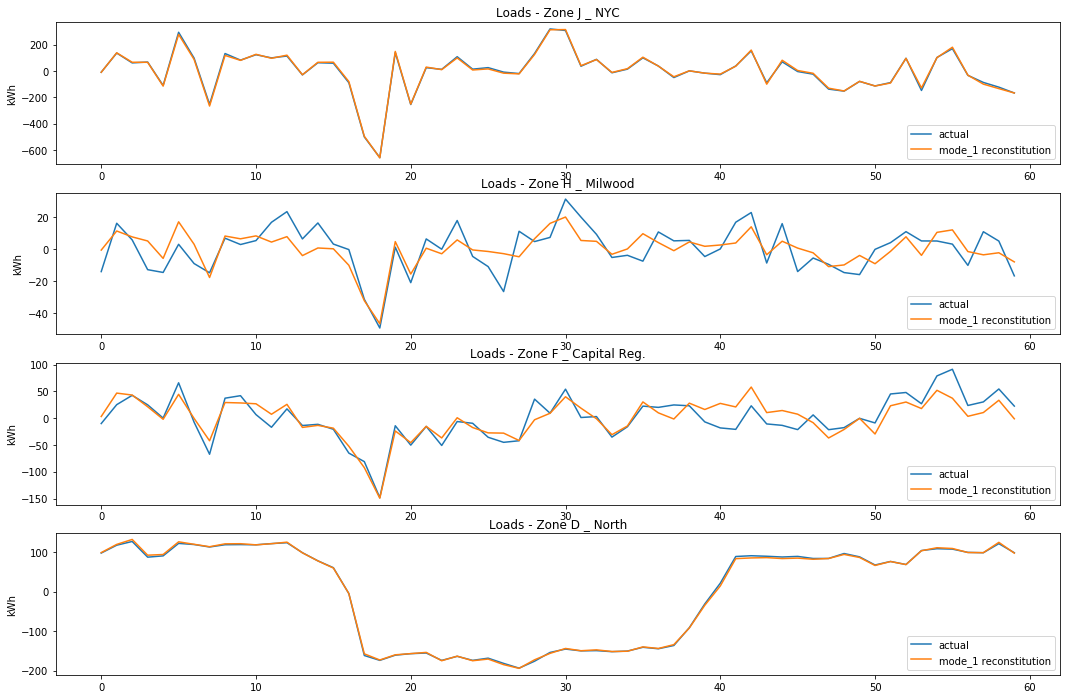

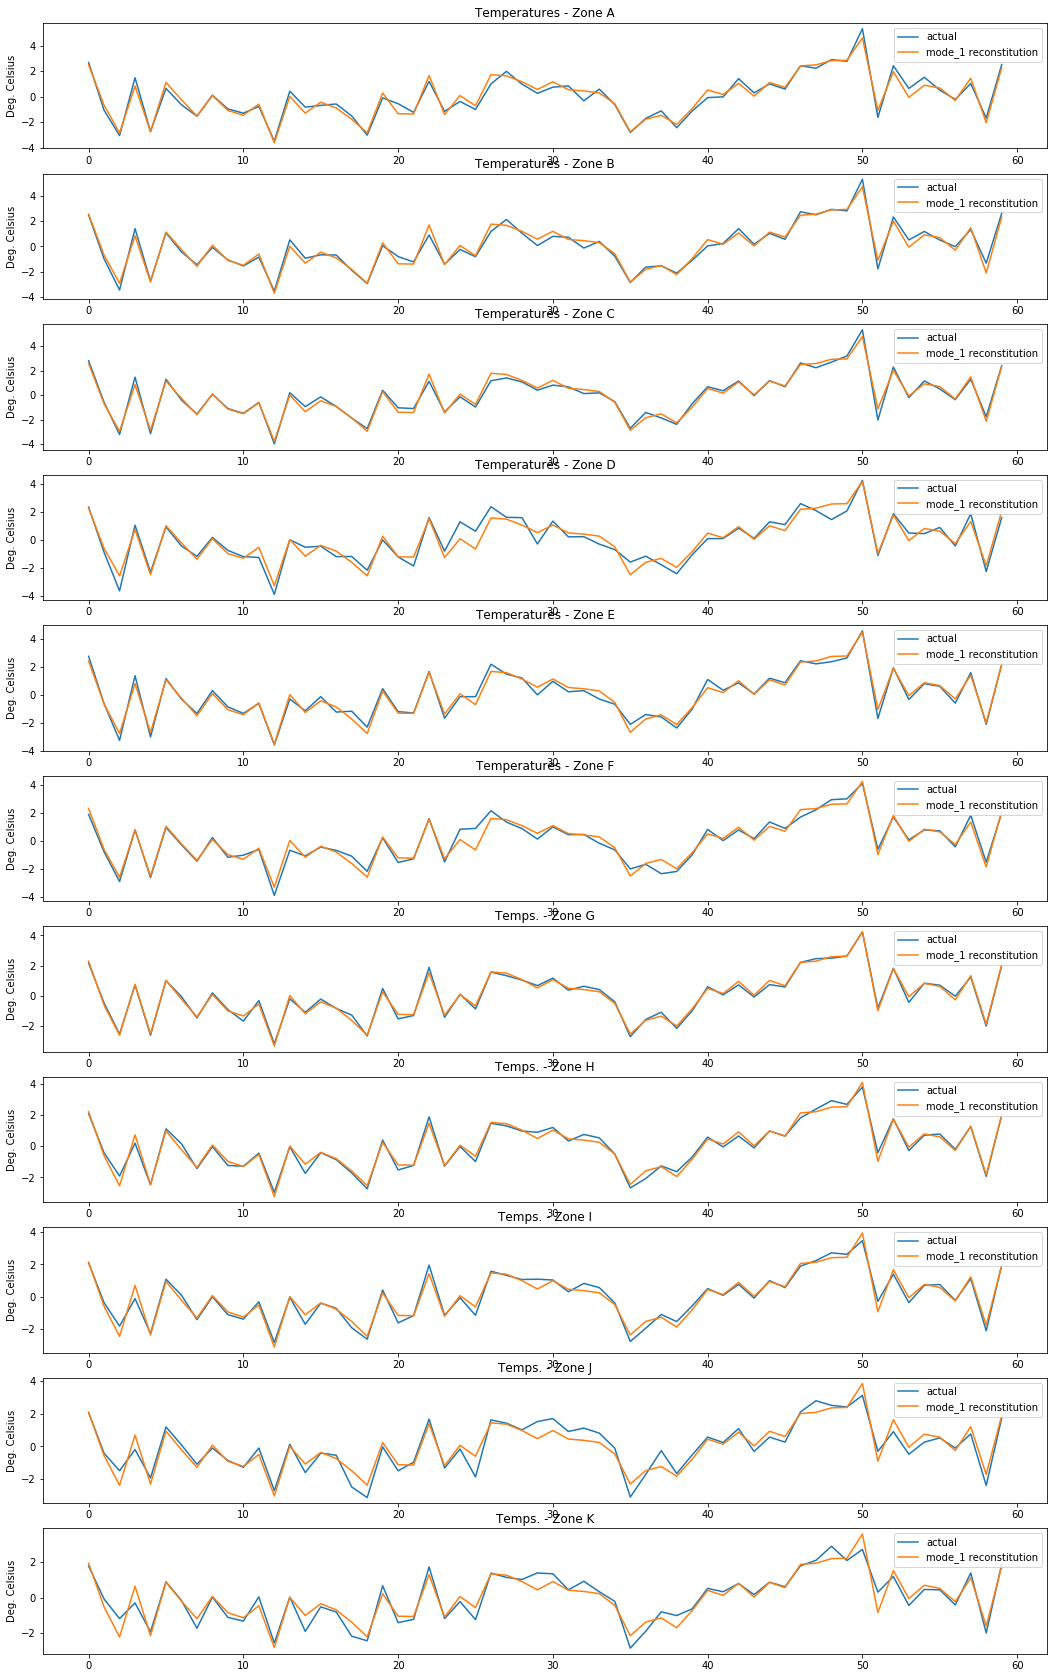

In [87]:
plt.figure(figsize=(18,12))
plt.subplot(4, 1, 1)
plt.plot(Xdm[:,9], label = 'actual')
plt.plot(Xr2[:,9], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.ylabel('kWh')
plt.title("Loads - Zone J _ NYC")

plt.subplot(4, 1, 2)
plt.plot(Xdm[:,7], label = 'actual')
plt.plot(Xr2[:,7], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.ylabel('kWh')
plt.title("Loads - Zone H _ Milwood")

plt.subplot(4, 1, 3)
plt.plot(Xdm[:,5], label = 'actual')
plt.plot(Xr2[:,5], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.ylabel('kWh')
plt.title("Loads - Zone F _ Capital Reg.")

plt.subplot(4, 1, 4)
plt.plot(Xdm[:,3], label = 'actual')
plt.plot(Xr2[:,3], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.ylabel('kWh')
plt.title("Loads - Zone D _ North")
plt.show()

plt.figure(figsize=(18,30))
plt.subplot(11, 1, 1)
plt.plot(Ydm[:,0], label = 'actual')
plt.plot(Yr1[:,0], label = "mode_1 reconstitution")
plt.legend(loc='upper right')
plt.ylabel('Deg. Celsius')
plt.title("Temperatures - Zone A")

plt.subplot(11, 1, 2)
plt.plot(Ydm[:,1], label = 'actual')
plt.plot(Yr1[:,1], label = "mode_1 reconstitution")
plt.legend(loc='upper right')
plt.ylabel('Deg. Celsius')
plt.title("Temperatures - Zone B")

plt.subplot(11, 1, 3)
plt.plot(Ydm[:,2], label = 'actual')
plt.plot(Yr1[:,2], label = "mode_1 reconstitution")
plt.legend(loc='upper right')
plt.ylabel('Deg. Celsius')
plt.title("Temperatures - Zone C")

plt.subplot(11, 1, 4)
plt.plot(Ydm[:,3], label = 'actual')
plt.plot(Yr1[:,3], label = "mode_1 reconstitution")
plt.legend(loc='upper right')
plt.ylabel('Deg. Celsius')
plt.title("Temperatures - Zone D")

plt.subplot(11, 1, 5)
plt.plot(Ydm[:,4], label = 'actual')
plt.plot(Yr1[:,4], label = "mode_1 reconstitution")
plt.legend(loc='upper right')
plt.ylabel('Deg. Celsius')
plt.title("Temperatures - Zone E")

plt.subplot(11, 1, 6)
plt.plot(Ydm[:,5], label = 'actual')
plt.plot(Yr1[:,5], label = "mode_1 reconstitution")
plt.legend(loc='upper right')
plt.ylabel('Deg. Celsius')
plt.title("Temperatures - Zone F")

plt.subplot(11, 1, 7)
plt.plot(Ydm[:,6], label = 'actual')
plt.plot(Yr1[:,6], label = "mode_1 reconstitution")
plt.legend(loc='upper right')
plt.ylabel('Deg. Celsius')
plt.title("Temps. - Zone G")

plt.subplot(11, 1, 8)
plt.plot(Ydm[:,7], label = 'actual')
plt.plot(Yr1[:,7], label = "mode_1 reconstitution")
plt.legend(loc='upper right')
plt.ylabel('Deg. Celsius')
plt.title("Temps. - Zone H")

plt.subplot(11, 1, 9)
plt.plot(Ydm[:,8], label = 'actual')
plt.plot(Yr1[:,8], label = "mode_1 reconstitution")
plt.legend(loc='upper right')
plt.ylabel('Deg. Celsius')
plt.title("Temps. - Zone I")

plt.subplot(11, 1, 10)
plt.plot(Ydm[:,9], label = 'actual')
plt.plot(Yr1[:,9], label = "mode_1 reconstitution")
plt.legend(loc='upper right')
plt.ylabel('Deg. Celsius')
plt.title("Temps. - Zone J")

plt.subplot(11, 1, 11)
plt.plot(Ydm[:,10], label = 'actual')
plt.plot(Yr1[:,10], label = "mode_1 reconstitution")
plt.legend(loc='upper right')
plt.ylabel('Deg. Celsius')
plt.title("Temps. - Zone K")

plt.show()

In [97]:
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    from numpy import eye, dot, sum, diag, asarray
    import numpy as np
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = np.linalg.svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

# Rotate the 2 main eigenvectors
Xt = EX[:,0:2]
Xrot=varimax(Xt)

# Rotate the main eigenvector
Yt = EY[:,0:3]
Yrot=varimax(Yt)

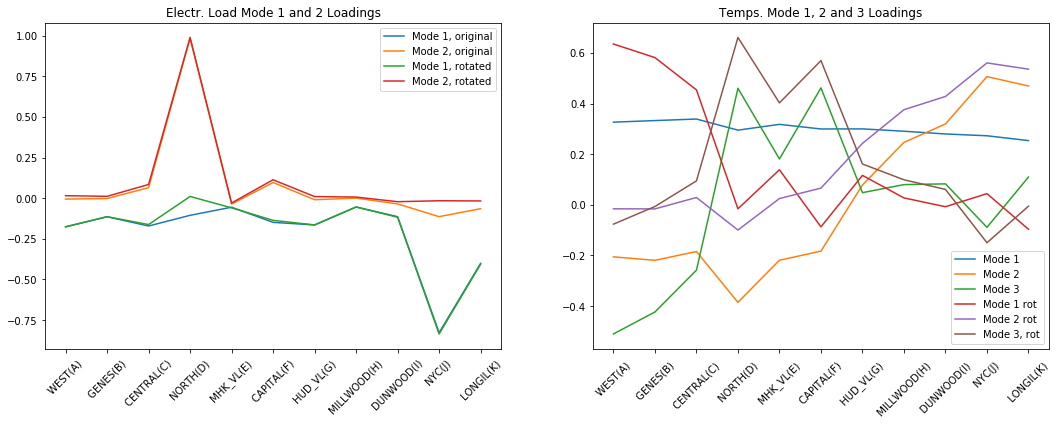

In [96]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.plot(loadzones,EX[:,0], label = 'Mode 1, original')
plt.plot(EX[:,1], label = 'Mode 2, original')
plt.plot(Xrot[:,0], label='Mode 1, rotated' )
plt.plot(Xrot[:,1], label='Mode 2, rotated')

plt.title('Electr. Load Mode 1 and 2 Loadings')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(load_names,EY[:,0], label = 'Mode 1')
plt.plot(EY[:,1], label = 'Mode 2')
plt.plot(EY[:,2], label = 'Mode 3')
plt.plot(load_names,Yrot[:,0], label = 'Mode 1 rot')
plt.plot(load_names,Yrot[:,1], label = 'Mode 2 rot')
plt.plot(load_names,Yrot[:,2], label = 'Mode 3, rot')
plt.title('Temps. Mode 1, 2 and 3 Loadings')
plt.xticks(rotation=45)
plt.legend()

plt.legend()
plt.show()

### Part B.3, 4

Correlations coefficients between first **principle components** X (loads) and Y (temperatures). 

In [89]:
uX1=uX1.reshape(60,)
uY1=uY1.reshape(60,)
pearsonr(uX1,uY1)

(-0.1351545842051686, 0.30319132569420426)

### Part C - Calculating  the MCA

In [100]:
# Covariance Matrix Rxz
Rxy = Xdm.transpose() @ Ydm/(n-1) # (13.42)

In [102]:
# SVD Decomposition of Rxz
# Rxz = P * Lamda * Q'
P, L, Qt = np.linalg.svd(Rxy)
L

array([180.9252, 37.3557, 17.4486, 3.5783, 3.0619, 1.3961, 0.8028, 0.4554, 0.3817, 0.1606, 0.0666])

In [103]:
# Principal Components
A = Xdm@P
B = Ydm@Qt.transpose()
# Covariance
C = A.transpose() @ B / (n-1)
print(C)


[[180.9252 -0.0000 -0.0000 -0.0000 0.0000 -0.0000 -0.0000 0.0000 -0.0000 -0.0000 -0.0000]
 [-0.0000 37.3557 0.0000 -0.0000 -0.0000 -0.0000 0.0000 0.0000 -0.0000 0.0000 0.0000]
 [0.0000 0.0000 17.4486 0.0000 0.0000 0.0000 -0.0000 -0.0000 0.0000 -0.0000 0.0000]
 [-0.0000 -0.0000 -0.0000 3.5783 -0.0000 -0.0000 0.0000 -0.0000 0.0000 0.0000 0.0000]
 [0.0000 0.0000 0.0000 -0.0000 3.0619 -0.0000 0.0000 0.0000 -0.0000 0.0000 0.0000]
 [0.0000 0.0000 0.0000 0.0000 0.0000 1.3961 -0.0000 -0.0000 0.0000 -0.0000 0.0000]
 [0.0000 0.0000 -0.0000 0.0000 0.0000 -0.0000 0.8028 -0.0000 -0.0000 -0.0000 -0.0000]
 [0.0000 -0.0000 -0.0000 -0.0000 -0.0000 -0.0000 0.0000 0.4554 -0.0000 0.0000 0.0000]
 [0.0000 0.0000 -0.0000 0.0000 -0.0000 0.0000 -0.0000 -0.0000 0.3817 -0.0000 -0.0000]
 [0.0000 0.0000 0.0000 -0.0000 0.0000 0.0000 -0.0000 -0.0000 0.0000 0.1606 0.0000]
 [-0.0000 -0.0000 0.0000 -0.0000 -0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0666]]


Notice the diagonal of the Covariance matrix is the  same L we obtained in the SVD decomposition.

In [107]:
# Calculate the correlations
A1 = A[:,0]
B1 = B[:,0]
C1 = A1.transpose()@B1/(n-1)


Rmca1 = A1.transpose() @ B1 / (n-1) / (st.variance(A1) * st.variance(B1))**0.5 
Rmca1

0.2311739520653336

In [108]:
print(pearsonr(A[:,0],B[:,0]))

(0.23117395206533362, 0.07554261204466414)
